---

_You are currently looking at **version 1.1** of this notebook. _

---

# SI 670 Assignment 3 - Linear classifiers, evaluation methods, and grid search (75 points total)

In this assignment you will train several linear classifier models and evaluate how effectively they predict instances of fraud using data based on [this dataset from Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud). Then you'll perform a grid search to find optimal parameters. 
 
Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [1]:
import numpy as np
import pandas as pd

### Question 1 (5 points)
Import the data from `fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [3]:
def answer_one():
    # YOUR CODE HERE
    df = pd.read_csv("fraud_data.csv")
    counts = df.groupby('Class').size().tolist()
    return counts[0]/(counts[0]+counts[1])
answer_one()

0.9835891762319642

In [4]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Question 2 (10 points)

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [5]:
def answer_two():
    # YOUR CODE HERE
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import recall_score
    
    dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train) 
    y_pred = dummy_majority.predict(X_test)
    accScore = accuracy_score(y_pred, y_test)
    recallScore = recall_score(y_pred, y_test)
    print("Accuracy score: ", accScore)
    print("Recall score: ", recallScore)
    
    return accScore, recallScore
answer_two()

Accuracy score:  0.9852507374631269
Recall score:  0.0


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


(0.9852507374631269, 0.0)

### Question 3 (10 points)

Using X_train, X_test, y_train, y_test (as defined above), train a linear support vector classifier using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [8]:
def answer_three():
    # YOUR CODE HERE
    from sklearn.svm import SVC
    from sklearn.metrics import accuracy_score, recall_score, precision_score
    svm = SVC().fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    accScore = accuracy_score(y_pred,y_test)
    recScore = recall_score(y_pred,y_test)
    precScore = precision_score(y_pred,y_test)
    return accScore, recScore, precScore 
answer_three()

(0.9907817109144543, 1.0, 0.375)

### Question 4 (10 points)

Using a non-linear support vector classifier SVC (which defaults to a Radial Basis Function kernel) with parameters `{'C': 1e9, 'gamma': 2e-07}`, what is the confusion matrix when using a threshold of -230 on the decision function? Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [10]:
# To-Do : Using a threshold of -230 on the decision function 

def answer_four():
    # YOUR CODE HERE
    from sklearn.svm import SVC
    from sklearn.metrics import confusion_matrix
    clf = SVC(kernel = 'rbf', gamma = 2e-07,C = 1e9).fit(X_train, y_train)
    y_predicted = clf.predict(X_test)
    confusion_mc = confusion_matrix(y_test, y_predicted)
    return confusion_mc
answer_four()

array([[5336,    8],
       [  16,   64]])

### Question 5 (20 points)

Train a logistic regression classifier with default parameters using X_train and y_train.

For the logistic regression classifier, create (1) a precision-recall curve and (2) a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the ROC curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*
*You should also includce code to generate the precision/recall and ROC curves above*

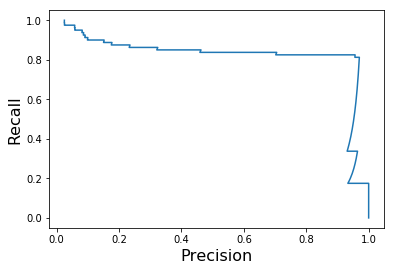

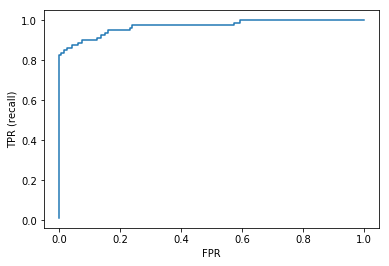

In [12]:
# add code here to train the classifier and plot the P/R and ROC curves
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, roc_curve
import matplotlib.pyplot as plt

clf = LogisticRegression().fit(X_train, y_train)
y_predicted = clf.predict(X_test)

precision, recall, thresholds = precision_recall_curve(y_test, clf.decision_function(X_test))
plt.figure()
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, clf.decision_function(X_test))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.show()

### Question 6 (20 points)

(a) (13 points) Perform a grid search over the parameters listed below for a Logistic Regression classifier, using recall for scoring and the default 3-fold cross validation.

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 0.5, 1, 10, 100]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`0.5`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|
| **`100`**  	|    ?	|   ? 	|

<br>

*This function should return a 6 by 2 numpy array with 12 floats.* 

*Note: do not return a DataFrame, just the values denoted by `?` in a numpy array.*

In [13]:
## 'params': 
## [{'penalty': 'l1', 'C': 0.01}, {'penalty': 'l2', 'C': 0.01}, {'penalty': 'l1', 'C': 0.1}, {'penalty': 'l2', 'C': 0.1}, {'penalty': 'l1', 'C': 0.5}, {'penalty': 'l2', 'C': 0.5}, {'penalty': 'l1', 'C': 1}, {'penalty': 'l2', 'C': 1}, {'penalty': 'l1', 'C': 10}, {'penalty': 'l2', 'C': 10}, {'penalty': 'l1', 'C': 100}, {'penalty': 'l2', 'C': 100}]
def answer_six():    
    # YOUR CODE HERE
    from sklearn.model_selection import GridSearchCV
    clf = LogisticRegression()
    grid_values = {'C':[0.01, 0.1, 0.5, 1, 10, 100], 'penalty':["l1","l2"]}
    grid_clf = GridSearchCV(clf, param_grid = grid_values, scoring = 'recall')
    grid_clf.fit(X_train, y_train)
    scores = grid_clf.cv_results_['mean_train_score']
    print(scores)
    l1_C = [scores[i] for i in range(12) if i%2==0]
    l2_C = [scores[i] for i in range(12) if i%2==1]
    print(l1_C)
    print(l2_C)
    arr = np.array([l1_C,l2_C])
    return arr.T
answer_six()

[0.68115942 0.77355072 0.80615942 0.8134058  0.81702899 0.81521739
 0.81884058 0.81702899 0.82427536 0.82427536 0.82427536 0.82427536]
[0.6811594202898551, 0.8061594202898551, 0.8170289855072465, 0.818840579710145, 0.8242753623188405, 0.8242753623188405]
[0.7735507246376812, 0.8134057971014493, 0.8152173913043478, 0.8170289855072465, 0.8242753623188405, 0.8242753623188405]


/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


array([[0.68115942, 0.77355072],
       [0.80615942, 0.8134058 ],
       [0.81702899, 0.81521739],
       [0.81884058, 0.81702899],
       [0.82427536, 0.82427536],
       [0.82427536, 0.82427536]])

(b) (2 points) *What is the optimal combination of penalty setting and C value?*  (You can use the following helper function to visualize the results from your grid search.)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[0.68115942 0.77355072 0.80615942 0.8134058  0.81702899 0.81521739
 0.81884058 0.81702899 0.82427536 0.82427536 0.82427536 0.82427536]
[0.6811594202898551, 0.8061594202898551, 0.8170289855072465, 0.818840579710145, 0.8242753623188405, 0.8242753623188405]
[0.7735507246376812, 0.8134057971014493, 0.8152173913043478, 0.8170289855072465, 0.8242753623188405, 0.8242753623188405]


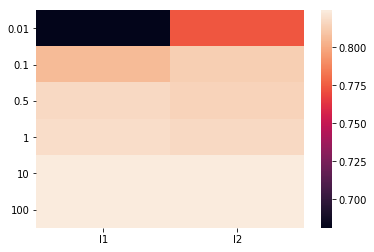

In [14]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    %matplotlib inline
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(6,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 0.5, 1, 10, 100])
    plt.yticks(rotation=0);

GridSearch_Heatmap(answer_six())

(c) (5 points) Your fraud data was provided by a client who represents a large banking company. What is your final recommendation for the type of classifier and settings they should use to detect fraud in their system -- and why?